In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# suppress all warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("credit+cart.csv")

In [3]:
df.head(2)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


# Data exploratory

In [4]:
df.shape

(8950, 18)

In [5]:
#check the null value
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
# remove the cus_ID
df=df.drop('CUST_ID',axis=1)


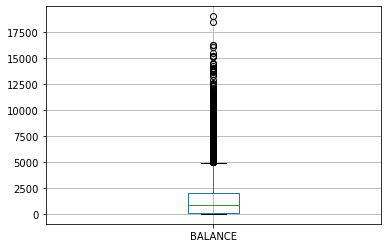

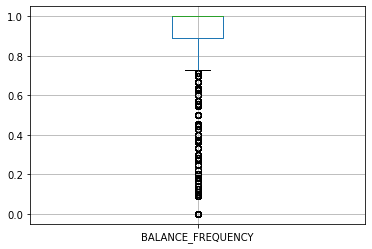

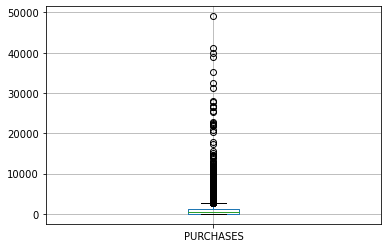

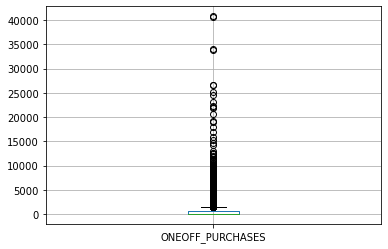

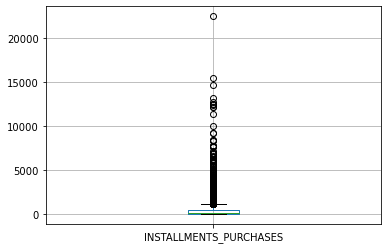

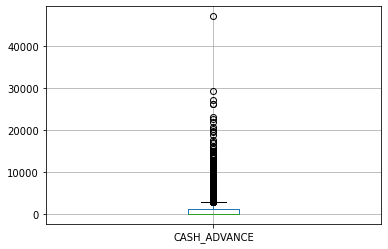

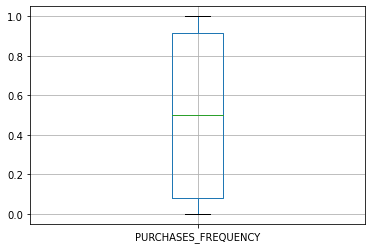

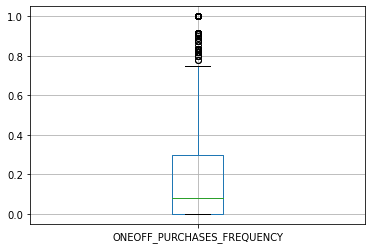

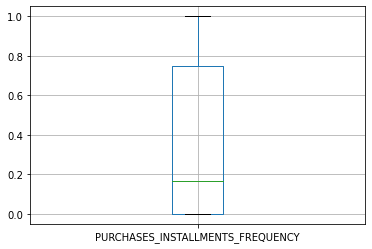

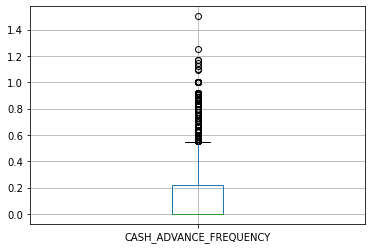

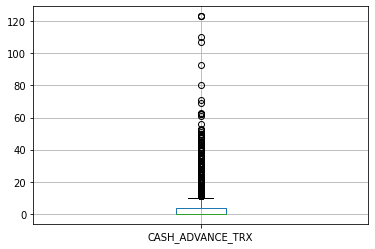

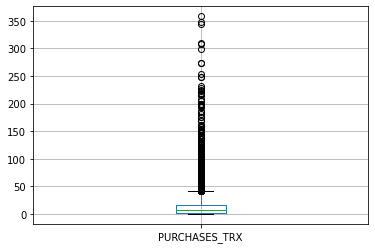

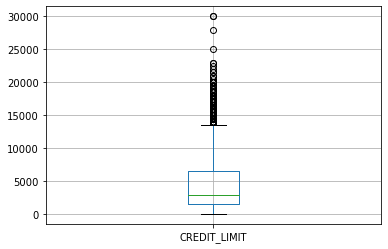

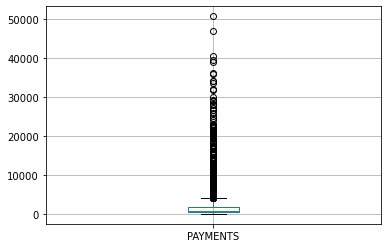

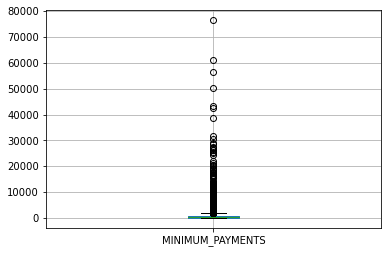

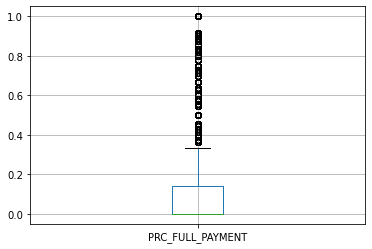

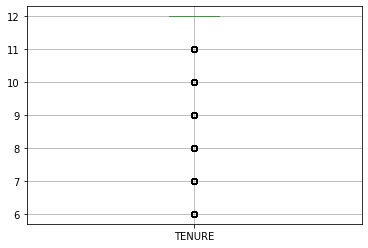

In [7]:
# explore the outlier
for column in df:
    plt.figure()
    df.boxplot([column])

In [9]:
# find the percentage of the outlier
def outlier_percent(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - (1.5 * IQR)
    maximum = Q3 + (1.5 * IQR)
    num_outliers =  np.sum((df < minimum) |(df > maximum))
    num_total = df.count()
    return (num_outliers/num_total)*100

In [10]:
for column in df.columns:    
    percent = round(outlier_percent(df[column]), 2)
    print(f'Outliers in "{column}": {percent}%')

Outliers in "BALANCE": 7.77%
Outliers in "BALANCE_FREQUENCY": 16.68%
Outliers in "PURCHASES": 9.03%
Outliers in "ONEOFF_PURCHASES": 11.32%
Outliers in "INSTALLMENTS_PURCHASES": 9.69%
Outliers in "CASH_ADVANCE": 11.51%
Outliers in "PURCHASES_FREQUENCY": 0.0%
Outliers in "ONEOFF_PURCHASES_FREQUENCY": 8.74%
Outliers in "PURCHASES_INSTALLMENTS_FREQUENCY": 0.0%
Outliers in "CASH_ADVANCE_FREQUENCY": 5.87%
Outliers in "CASH_ADVANCE_TRX": 8.98%
Outliers in "PURCHASES_TRX": 8.56%
Outliers in "CREDIT_LIMIT": 2.77%
Outliers in "PAYMENTS": 9.03%
Outliers in "MINIMUM_PAYMENTS": 9.74%
Outliers in "PRC_FULL_PAYMENT": 16.47%
Outliers in "TENURE": 15.26%


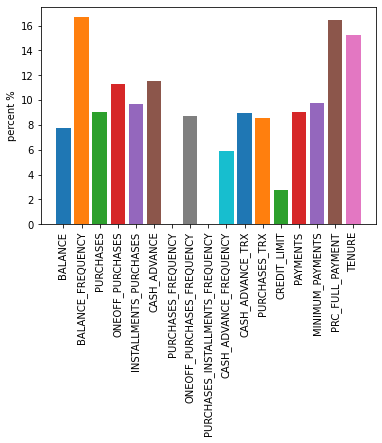

In [11]:
for column in df.columns:    
    percent = round(outlier_percent(df[column]), 2)
    
    plt.bar(column,percent)
    plt.xticks(rotation=90)
    plt.ylabel("percent %")
  

# Data Preprocessing

 there are three methods for outlier, 
1- drop the outlier / when we have enough data
2 use winsorize method/ replace the outlier with the observation close to them
3 use scaling,logtransformation,Box cox/ reduse the skwenss of data and make it normal
4 chane the outlier to null value and then traet it

<AxesSubplot:xlabel='CREDIT_LIMIT'>

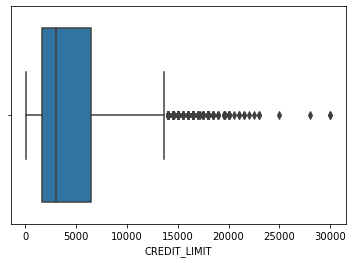

In [11]:
# use winsorize for the credit limit column
sns.boxplot(df['CREDIT_LIMIT'])

In [12]:
from scipy.stats.mstats import winsorize

In [13]:
Q1 = df['CREDIT_LIMIT'].quantile(0.25)
Q3 = df['CREDIT_LIMIT'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - (1.5 * IQR)
upper = Q3 + (1.5 * IQR)

In [14]:
lower

-5750.0

In [15]:
upper

13850.0

In [16]:
df['CREDIT_LIMIT'].quantile(0.972)

13500.0

In [17]:
df['CREDIT_LIMIT_winsorize']=winsorize(df['CREDIT_LIMIT'],0.028)

<AxesSubplot:xlabel='CREDIT_LIMIT_winsorize'>

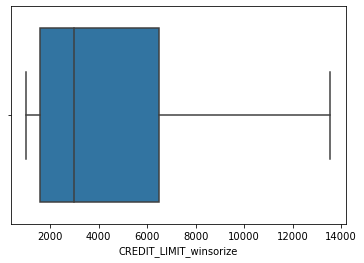

In [18]:
sns.boxplot(df['CREDIT_LIMIT_winsorize'])

In [18]:
#see the column befor and after the winsorize ; the mean,min , max and std are changed
df['CREDIT_LIMIT_winsorize'].describe()

count     8950.000000
mean      4423.315992
std       3349.838781
min       1000.000000
25%       1600.000000
50%       3000.000000
75%       6500.000000
max      13550.000000
Name: CREDIT_LIMIT_winsorize, dtype: float64

In [19]:
df['CREDIT_LIMIT'].describe()

count     8949.000000
mean      4494.449450
std       3638.815725
min         50.000000
25%       1600.000000
50%       3000.000000
75%       6500.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64

In [20]:
df=df.drop(['CREDIT_LIMIT'],axis=1)

In [21]:
df['CREDIT_LIMIT']=df['CREDIT_LIMIT_winsorize']

<AxesSubplot:xlabel='CASH_ADVANCE_FREQUENCY'>

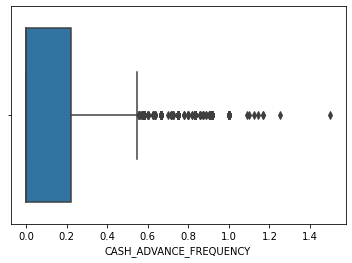

In [23]:
# use winsorize for cash advance frequency and balance
sns.boxplot(df['CASH_ADVANCE_FREQUENCY'])

In [22]:
Q1 = df['CASH_ADVANCE_FREQUENCY'].quantile(0.25)
Q3 = df['CASH_ADVANCE_FREQUENCY'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - (1.5 * IQR)
upper = Q3 + (1.5 * IQR)

In [23]:
lower

-0.333333

In [24]:
upper

0.555555

In [25]:
df['CASH_ADVANCE_FREQUENCY'].quantile(0.941)

0.545455

In [26]:
df['CASH_ADVANCE_FREQUENCY_winsorize']=winsorize(df['CASH_ADVANCE_FREQUENCY'],0.059)

<AxesSubplot:xlabel='CASH_ADVANCE_FREQUENCY_winsorize'>

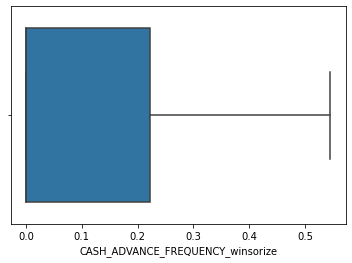

In [29]:
sns.boxplot(df['CASH_ADVANCE_FREQUENCY_winsorize'])

In [27]:
df['BALANCE_winsorize']=winsorize(df['BALANCE'],0.078)

<AxesSubplot:xlabel='BALANCE_winsorize'>

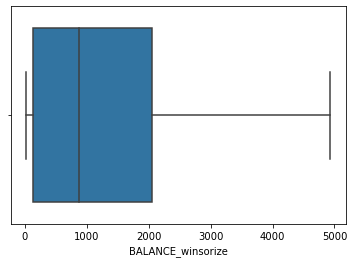

In [31]:
sns.boxplot(df['BALANCE_winsorize'])

In [28]:
df=df.drop(['BALANCE'],axis=1)

In [29]:
df=df.drop(['CASH_ADVANCE_FREQUENCY'],axis=1)

In [30]:
df['CASH_ADVANCE_FREQUENCY']=df['CASH_ADVANCE_FREQUENCY_winsorize']

In [31]:
df['BALANCE']=df['BALANCE_winsorize']

In [32]:
df=df.drop(columns=['BALANCE_winsorize','CASH_ADVANCE_FREQUENCY_winsorize','CREDIT_LIMIT_winsorize'],axis=1)

In [33]:
# transfer the outlier for the remaining column to null value
df_null=df.drop(columns=['BALANCE','CREDIT_LIMIT','CASH_ADVANCE_FREQUENCY'],axis=1)

In [34]:
for column in df.columns:
    data = df[column]
    
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - (1.5 * IQR)
    maximum = Q3 + (1.5 * IQR)
 
    outliers = ((data < minimum) |(data > maximum))
    df[column].loc[outliers] = np.nan
    
df.isna().sum()

BALANCE_FREQUENCY                   1493
PURCHASES                            808
ONEOFF_PURCHASES                    1013
INSTALLMENTS_PURCHASES               867
CASH_ADVANCE                        1030
PURCHASES_FREQUENCY                    0
ONEOFF_PURCHASES_FREQUENCY           782
PURCHASES_INSTALLMENTS_FREQUENCY       0
CASH_ADVANCE_TRX                     804
PURCHASES_TRX                        766
PAYMENTS                             808
MINIMUM_PAYMENTS                    1154
PRC_FULL_PAYMENT                    1474
TENURE                              1366
CREDIT_LIMIT                           0
CASH_ADVANCE_FREQUENCY                 0
BALANCE                                0
dtype: int64

In [35]:
len(df.columns)

17

#replace the missing value with mean,mode,median or use KNN computer
for column in df:
    plt.figure()
    df.hist([column])

In [36]:
#use KNN imputer to treat the missing value but we should normalize the data bcz KNN based on distance

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df_scaled.head()

,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CREDIT_LIMIT,CASH_ADVANCE_FREQUENCY,BALANCE
0,0.333333,0.035178,0.000000,0.081504,0.00000,0.166667,0.000000,0.083333,0.0,0.048780,0.048309,0.077069,0.000000,0.0,0.000000,0.000000,0.004925
1,0.666667,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.4,0.000000,0.982215,0.592457,0.666667,0.0,0.478088,0.458333,0.648081
2,1.000000,0.285103,0.535685,0.000000,0.00000,1.000000,NaN,0.000000,0.0,0.292683,0.148915,0.346564,0.000000,0.0,0.517928,0.000000,0.504192
3,NaN,0.552749,NaN,0.000000,0.07391,0.083333,0.111111,0.000000,0.1,0.024390,0.000000,NaN,0.000000,0.0,0.517928,0.152777,0.335655
4,1.000000,0.005900,0.011085,0.000000,0.00000,0.083333,0.111111,0.000000,0.0,0.024390,0.162385,0.135237,0.000000,0.0,0.015936,0.000000,0.162952


In [37]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_scaled = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [38]:
df.isna().sum()

BALANCE_FREQUENCY                   1493
PURCHASES                            808
ONEOFF_PURCHASES                    1013
INSTALLMENTS_PURCHASES               867
CASH_ADVANCE                        1030
PURCHASES_FREQUENCY                    0
ONEOFF_PURCHASES_FREQUENCY           782
PURCHASES_INSTALLMENTS_FREQUENCY       0
CASH_ADVANCE_TRX                     804
PURCHASES_TRX                        766
PAYMENTS                             808
MINIMUM_PAYMENTS                    1154
PRC_FULL_PAYMENT                    1474
TENURE                              1366
CREDIT_LIMIT                           0
CASH_ADVANCE_FREQUENCY                 0
BALANCE                                0
dtype: int64

# PCA

In [39]:
# pca to reduce the dimension
from sklearn.decomposition import PCA
var_ratio={}
for n in range(2,15):
    pc=PCA(n_components=n)
    df_pca=pc.fit(df_scaled)
    var_ratio[n]=sum(df_pca.explained_variance_ratio_)

In [40]:
var_ratio

{2: 0.8903616330516235,
 3: 0.9448460249156386,
 4: 0.9731076375590659,
 5: 0.9902025138663915,
 6: 0.9956592089199591,
 7: 0.9979695194415394,
 8: 0.9999972444584225,
 9: 0.9999997902078911,
 10: 0.9999999912751295,
 11: 0.999999996910507,
 12: 0.9999999982309216,
 13: 0.9999999988743591,
 14: 0.9999999994645151}

<AxesSubplot:>

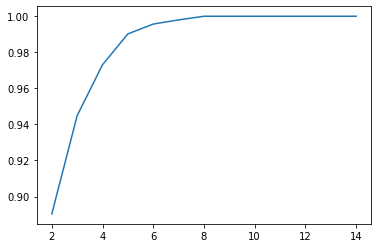

In [45]:
pd.Series(var_ratio).plot()

In [41]:
# since 7 component explain about 87% of data so we select component=7


df_final=PCA(n_components=7).fit(df_scaled)

df_reduced=df_final.fit_transform(df_scaled)

In [42]:
df_dataframe=pd.DataFrame(df_reduced)


In [43]:
df_dataframe.shape

(8950, 7)

In [49]:
column_list=df.columns
column_list

Index(['BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PAYMENTS', 'MINIMUM_PAYMENTS',
       'PRC_FULL_PAYMENT', 'TENURE', 'CREDIT_LIMIT', 'CASH_ADVANCE_FREQUENCY',
       'BALANCE'],
      dtype='object')

In [44]:
# Factor Analysis : variance explained by each component- 
pd.Series(df_final.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(7)])

PC_0    0.766341
PC_1    0.124021
PC_2    0.054484
PC_3    0.028262
PC_4    0.017095
PC_5    0.005457
PC_6    0.002310
dtype: float64

# Clustring

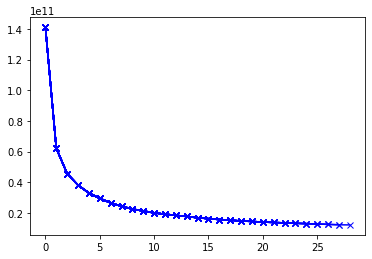

In [45]:
#find the optimum k avlue by ploting the No of clusters with WCSS(within cluster sumation of squares)
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
scores_1=[]
for i in range(1,30):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_reduced)
    scores_1.append(kmeans.inertia_)
    plt.plot(scores_1,'bx-')

In [46]:
from sklearn.metrics import silhouette_score
range_n_clusters = list (range(2,10))
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(df_reduced)
    centers = clusterer.cluster_centers_

    score = silhouette_score(df_reduced, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.5083940941827187)
For n_clusters = 3, silhouette score is 0.41814520222526114)
For n_clusters = 4, silhouette score is 0.41339389080802846)
For n_clusters = 5, silhouette score is 0.30725098374559884)
For n_clusters = 6, silhouette score is 0.3034958046895822)
For n_clusters = 7, silhouette score is 0.30448722117926263)
For n_clusters = 8, silhouette score is 0.3088151721087904)
For n_clusters = 9, silhouette score is 0.2964911652165989)


In [47]:
# Select K as 4 from elbow and silhouette score method

from sklearn.cluster import KMeans
km_5=KMeans(n_clusters=4,random_state=123)
km_5.fit(df_reduced)
label=km_5.labels_

In [48]:
df_cluster=pd.concat([pd.DataFrame(df_reduced),pd.DataFrame({'cluster':label})],axis=1)

In [63]:
df_cluster

,0,1,2,3,4,5,6,cluster
0,-3787.240505,528.394695,-583.652596,-69.811228,-282.957274,-9.021601,-27.975465,0
1,3287.426541,-1576.108308,1757.369748,1335.015226,-1253.733988,-74.439501,76.727411,2
2,3180.666417,21.854467,-675.136067,-826.069627,44.082773,-504.529757,-64.254932,3
3,2939.625686,849.235715,-754.026518,-1138.529062,962.993975,-605.512856,138.729986,3
4,-3338.617010,-193.873725,-303.230675,-55.074956,-553.057634,-118.031850,-130.405922,0
...,...,...,...,...,...,...,...,...
8945,-3772.067937,571.934484,-363.182498,-144.467465,-191.763741,134.516414,-112.905667,0
8946,-3773.253490,559.886496,-400.146877,-175.931047,-171.359862,157.149979,-13.273985,0
8947,-3806.807138,578.459985,-656.006195,-136.167895,-205.908773,27.143166,-76.916008,0
8948,-3819.591778,567.298780,-765.406063,-20.836015,-265.512858,-89.977910,-94.552373,0


In [64]:
d={0:'PCA1',1:'PCA2',2:'PCA3',3:'PCA4',4:'PCA5',5:'PCA5',6:'PCA7'}
df_cluster = df_cluster.rename(columns={0:'PCA1',1:'PCA2',2:'PCA3',3:'PCA4',4:'PCA5',5:'PCA5',6:'PCA7'})

In [65]:
df_cluster

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA5,PCA7,cluster
0,-3787.240505,528.394695,-583.652596,-69.811228,-282.957274,-9.021601,-27.975465,0
1,3287.426541,-1576.108308,1757.369748,1335.015226,-1253.733988,-74.439501,76.727411,2
2,3180.666417,21.854467,-675.136067,-826.069627,44.082773,-504.529757,-64.254932,3
3,2939.625686,849.235715,-754.026518,-1138.529062,962.993975,-605.512856,138.729986,3
4,-3338.617010,-193.873725,-303.230675,-55.074956,-553.057634,-118.031850,-130.405922,0
...,...,...,...,...,...,...,...,...
8945,-3772.067937,571.934484,-363.182498,-144.467465,-191.763741,134.516414,-112.905667,0
8946,-3773.253490,559.886496,-400.146877,-175.931047,-171.359862,157.149979,-13.273985,0
8947,-3806.807138,578.459985,-656.006195,-136.167895,-205.908773,27.143166,-76.916008,0
8948,-3819.591778,567.298780,-765.406063,-20.836015,-265.512858,-89.977910,-94.552373,0


In [66]:
pd.Series(label).value_counts()

0    5206
3    1696
2    1109
1     939
dtype: int64

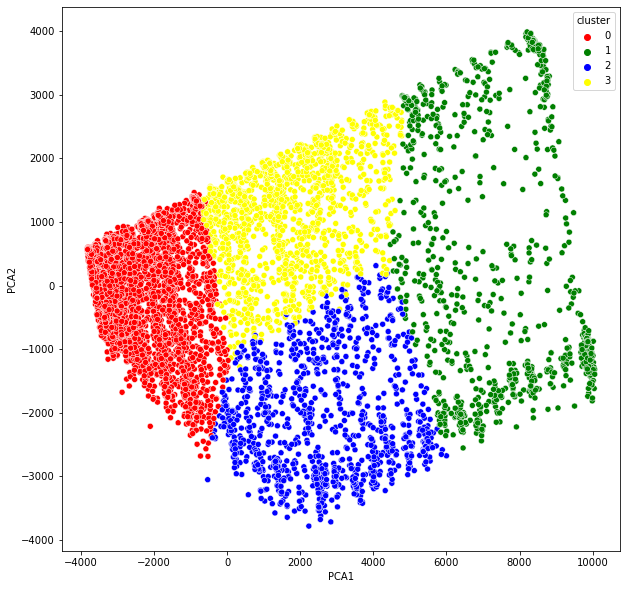

In [68]:
plt.figure(figsize=(10,10))
ax=sns.scatterplot(x='PCA1',y='PCA2',hue='cluster',data=df_cluster
                   ,palette=['red','green','blue','yellow'])

In [69]:
cluster_df_origion=pd.concat([df,pd.Series(label,name='Cluster')],axis=1)

In [70]:
cluster_df_origion

,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CREDIT_LIMIT,CASH_ADVANCE_FREQUENCY,BALANCE,Cluster
0,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.0,2.0,201.802084,139.509787,0.000000,12.0,1000.0,0.000000,40.900749,0
1,0.909091,0.00,0.00,0.00,NaN,0.000000,0.000000,0.000000,4.0,0.0,4103.032597,1072.340217,0.222222,12.0,7000.0,0.250000,3202.467416,2
2,1.000000,773.17,773.17,0.00,0.000000,1.000000,NaN,0.000000,0.0,12.0,622.066742,627.284787,0.000000,12.0,7500.0,0.000000,2495.148862,3
3,NaN,1499.00,NaN,0.00,205.788017,0.083333,0.083333,0.000000,1.0,1.0,0.000000,NaN,0.000000,12.0,7500.0,0.083333,1666.670542,3
4,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.0,1.0,678.334763,244.791237,0.000000,12.0,1200.0,0.000000,817.714335,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.0,6.0,325.594462,48.886365,NaN,NaN,1000.0,0.000000,28.493517,0
8946,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.0,6.0,275.861322,NaN,0.000000,NaN,1000.0,0.000000,19.183215,0
8947,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.0,5.0,81.270775,82.418369,0.250000,NaN,1000.0,0.000000,23.398673,0
8948,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,2.0,0.0,52.549959,55.755628,0.250000,NaN,1000.0,0.166667,16.690388,0


In [71]:
#Mean value gives a good indication of the distribution of data. 
#So we are finding mean value for each variable for each cluster
cluster=cluster_df_origion.groupby('Cluster').mean()

In [72]:
cluster

,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CREDIT_LIMIT,CASH_ADVANCE_FREQUENCY,BALANCE
Cluster,,,,,,,,,,,,,,,,,
0,0.969753,433.264021,163.096803,186.452882,383.331761,0.449470,0.099253,0.345726,1.531807,7.704980,823.151088,359.203387,0.035334,12.0,2092.477377,0.106882,793.698224
1,0.982953,726.290593,327.531367,229.231612,376.124596,0.588348,0.207094,0.422096,1.782269,11.170330,1760.634696,683.503869,0.028110,12.0,11674.174654,0.168743,2928.736228
2,0.987450,505.858796,224.552775,162.327205,1062.303263,0.400570,0.144384,0.284529,3.837037,7.602642,1495.025022,1097.072210,0.010093,12.0,6429.445036,0.278607,3974.825934
3,0.967910,859.975042,346.582800,268.388377,164.050582,0.620285,0.193114,0.442202,0.767299,12.627410,1319.973037,270.591518,0.055091,12.0,6251.731346,0.058429,680.678587


# hierarchy method

import scipy.cluster.hierarchy as sch
plt.figure(figsize=(35,35))
dendrogram = sch.dendrogram(sch.linkage(df_reduced, method = 'ward'))
plt.show()

In [49]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(df_reduced)

In [50]:
print('silhouette_score for hierarchy:', silhouette_score(df_reduced,hc.labels_))
print('silhouette_score for Kmean:', silhouette_score(df_reduced,label))

silhouette_score for hierarchy: 0.2095710252953679
silhouette_score for Kmean: 0.4138253062833159


In [ ]:
End